# PART B: Traffic Dataset 

Use the [Traffic_Data.csv](Traffic_Data.csv) to investigate a range of research objectives;

1. Understanding the traffic density on various days of the week in the urban
environments. [ 20 MARKS ]
2. Analyzing the impact of various factors like weather, economic conditions,
and vehicle types on traffic density and energy consumption. [ 10 MARKS ]
3. Developing and testing traffic density prediction algorithms for smart city
solutions. [ 10 MARKS ]

In [1]:
import pandas as pd

file_path = 'Traffic_Data.csv'
df = pd.read_csv(file_path)
df.head()


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [2]:
# Get information about the training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [3]:
# Check for missing values
df.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [4]:
# Check for unique rows
df.nunique()

City                          6
Vehicle Type                  4
Weather                       5
Economic Condition            3
Day Of Week                   7
Hour Of Day                  24
Speed                    670544
Is Peak Hour                  2
Random Event Occurred         2
Energy Consumption       665672
Traffic Density           14209
dtype: int64

In [5]:
df.columns


Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

In [6]:
df.shape

(1219567, 11)

In [7]:
#Remove duplicate rows
df.drop_duplicates(inplace=True)
df.shape


(1219567, 11)

# Understanding the traffic density on various days of the week in the urban environments. [20 Marks]

**Null Hypothesis:** There is no significant difference in traffic density on different days of the week in urban environments.

**Alternative Hypothesis:** There is a significant difference in traffic density on different days of the week in urban environments.

In [8]:
selected_vars = ['City', 'Day Of Week', 'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred', 'Traffic Density']

density_data = df[selected_vars]
density_data.head()

,City,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Traffic Density
0,SolarisVille,Sunday,20,29.4268,0,0,0.5241
1,AquaCity,Wednesday,2,118.8000,0,0,0.3208
2,Neuroburg,Wednesday,16,100.3904,0,0,0.0415
3,Ecoopolis,Thursday,8,76.8000,1,0,0.1811
4,AquaCity,Saturday,16,45.2176,0,0,0.4544


In [9]:
density_data.columns

Index(['City', 'Day Of Week', 'Hour Of Day', 'Speed', 'Is Peak Hour',
       'Random Event Occurred', 'Traffic Density'],
      dtype='object')

In [10]:
# Group data by day of the week and calculate mean, median, std deviation
grouped_data = density_data.groupby('Day Of Week')['Traffic Density'].agg(['max', 'min', 'mean', 'median', 'std'])
grouped_data.transpose()


Day Of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
max,3.377600,2.427600,3.211000,3.183500,2.362400,2.639600,2.387500
min,0.006800,0.006200,0.006000,0.006000,0.006000,0.005900,0.006700
mean,0.280504,0.273950,0.283474,0.283350,0.272366,0.272943,0.273143
median,0.219200,0.214900,0.227000,0.226900,0.213300,0.215200,0.214800
std,0.224672,0.215556,0.225341,0.225766,0.213735,0.214196,0.213689


##### Observation:

**Max:** There is a slight increase on Friday, Saturday, and Sunday, with values around 3.183 to 3.377. This indicates that the peak traffic conditions are different for weekdays and weekends.


**Min:** The minimum values vary slightly from day to day, ranging from about 0.0059 to 0.0068. This suggests that the least amount of traffic differs slightly across the week, but generally remains very low.


**Mean:** There is a slight increase on Friday, Saturday, and Sunday, with values around 0.276 to 0.279. This implies that, on average, traffic is slightly denser during the weekends compared to weekdays.


**Median:** The median values are also quite consistent, with a small increase noted from weekdays to weekends. This increase from about 0.214 on Monday to about 0.227 on Saturday suggests that more than half of the traffic data points are higher on weekends.


**Std (Standard Deviation):** The standard deviations are close across all days, ranging from about 0.201 to 0.209, indicating that the variability of traffic density is similar each day of the week.

### Data Visualization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

density_data_days_format = density_data.copy()

# Create a categorical type with the days of the week in order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
density_data_days_format['Day Of Week'] = pd.Categorical(density_data_days_format['Day Of Week'], categories=days_of_week, ordered=True)

<Axes: title={'center': 'Traffic Density'}, xlabel='Day Of Week'>

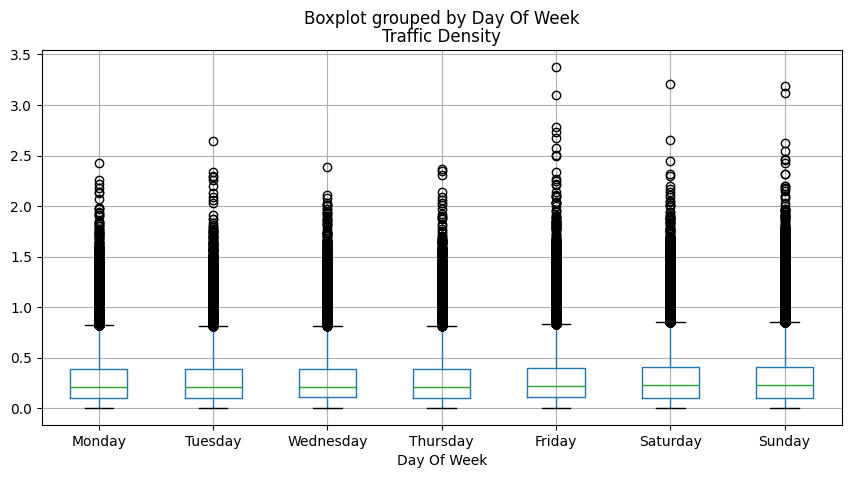

In [12]:

density_data_days_format.boxplot(column='Traffic Density', by='Day Of Week', vert=True, figsize=(10,5))

##### **Observation:**

The boxplot suggests that the **median traffic density is consistent across different days of the week**, indicating that the 'Day Of Week' variable **does not have a strong systematic effect** on 'Traffic Density.' Similarly, the **interquartile ranges are comparable across days**, which implies a lack of a strong association between the day of the week and the typical levels of traffic density. 

However, the **outliers, particularly on days like Friday**, necessitate additional analysis to understand occasional increases in traffic density. While these findings suggest that 'Day Of Week' **may not be strongly associated with median traffic density**, it could still have an impact on the frequency of **extreme traffic conditions**.

In [13]:
def box_plot_grids(df, cities):
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
  axes = axes.flatten()
  
  day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
  
  for i, city in enumerate(cities):
      subset = df[df['City'] == city]
      
      # Plot on the ith subplot
      subset.boxplot(column='Traffic Density', by='Day Of Week', ax=axes[i], vert=True)
      
      axes[i].set_title(f'Traffic Density by Day of Week in {city}')
      axes[i].set_xlabel('Day Of Week')
      axes[i].set_ylabel('Traffic Density')
      
      axes[i].set_xticklabels(day_names)
      
      plt.suptitle('')
  
  plt.tight_layout()
  plt.show()

In [14]:
cities = df['City'].unique() 
cities

array(['SolarisVille', 'AquaCity', 'Neuroburg', 'Ecoopolis', 'TechHaven',
       'MetropolisX'], dtype=object)

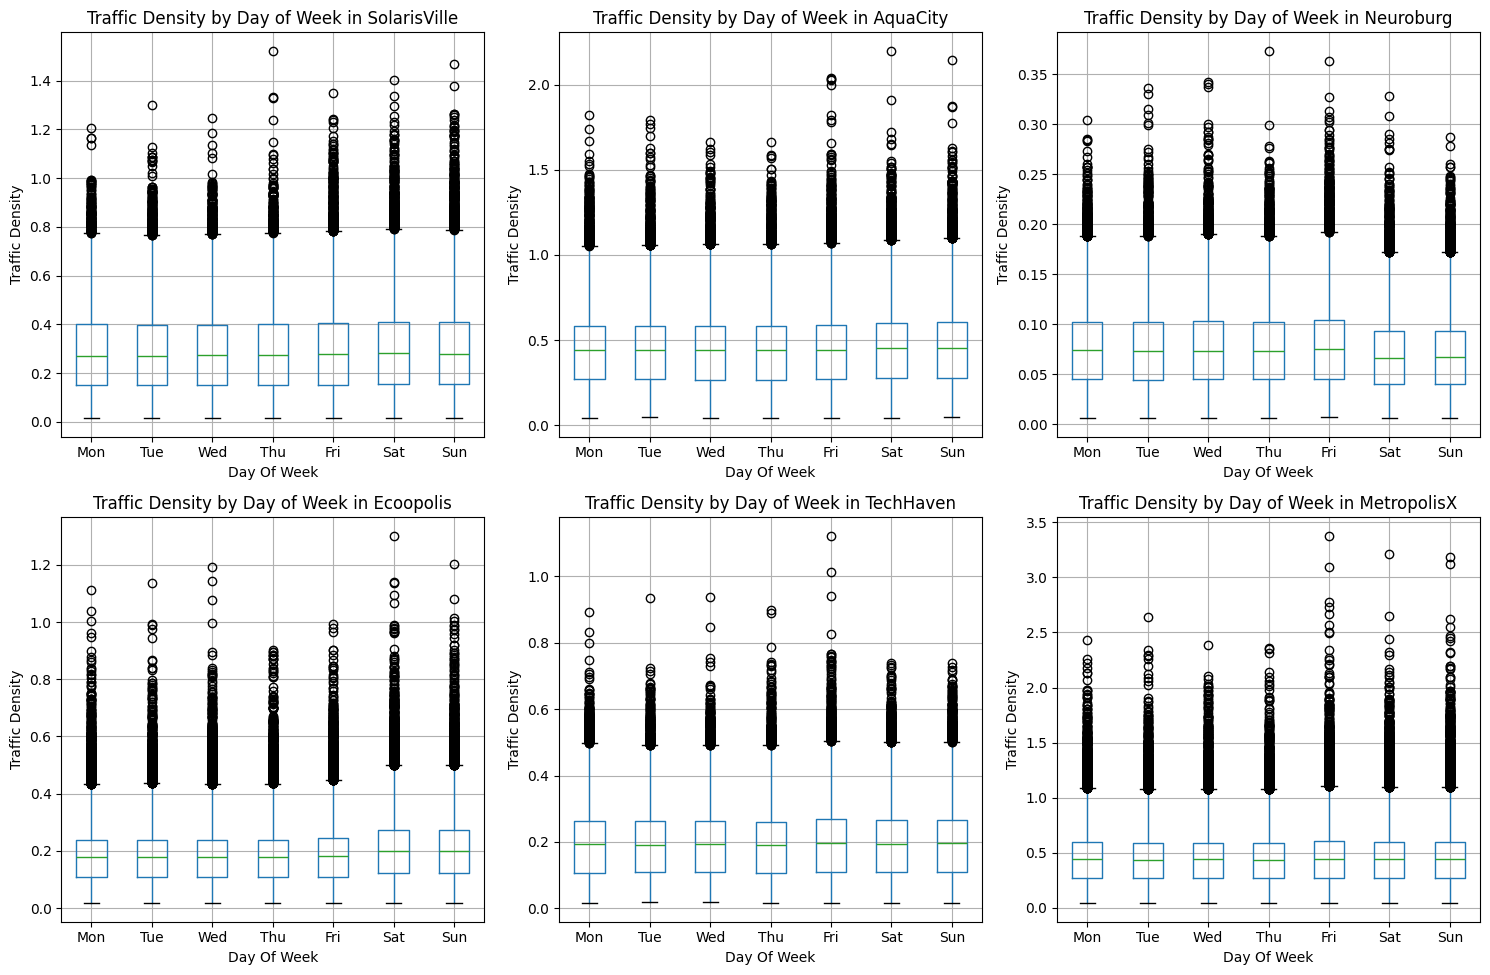

In [15]:
box_plot_grids(density_data_days_format, cities)

##### **Observation:** 

> From a quick glance, the traffic density appears relatively consistent throughout the week for each city, as indicated by the similar median lines across days. However, there are noticeable outliers in some cities on specific days, suggesting occasional spikes or drops in traffic density. The consistent median across days could imply that there is no single weekday that consistently experiences significantly higher or lower traffic compared to others.

In [16]:
mean_traffic_density = density_data_days_format.groupby('Day Of Week', observed=True)['Traffic Density'].mean().reset_index()
mean_traffic_density.rename(columns={'Traffic Density': 'Mean Traffic Density'}, inplace=True)
mean_traffic_density

,Day Of Week,Mean Traffic Density
0,Monday,0.273950
1,Tuesday,0.272943
2,Wednesday,0.273143
3,Thursday,0.272366
4,Friday,0.280504
5,Saturday,0.283474
6,Sunday,0.283350


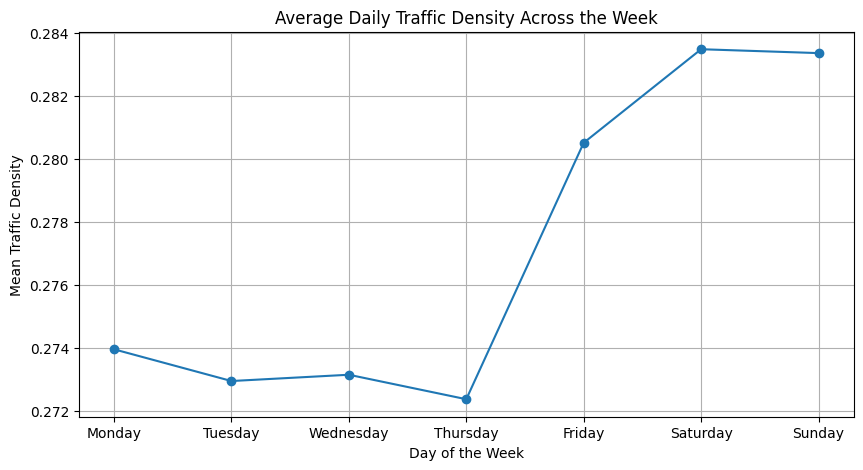

In [17]:
# Create line graph
plt.figure(figsize=(10, 5))
plt.plot(mean_traffic_density['Day Of Week'], mean_traffic_density['Mean Traffic Density'], marker='o')
plt.title('Average Daily Traffic Density Across the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Traffic Density')
plt.grid(True)
plt.show()

In [18]:
def line_plot_grids(df):
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
  axes = axes.flatten()
  
  for i, (city, values) in enumerate(df.iterrows()):
    if i < 6:  # Only plot for the first 6 cities to fit into a 3x2 grid
        ax = axes[i]
        values.plot(ax=ax, marker='o', title=f'Average Traffic Density in {city}')
        ax.set_ylabel('Mean Traffic Density')
        ax.set_xlabel('Day of the Week')
        ax.grid(True)

  # Adjust layout
  plt.tight_layout()
  plt.show()

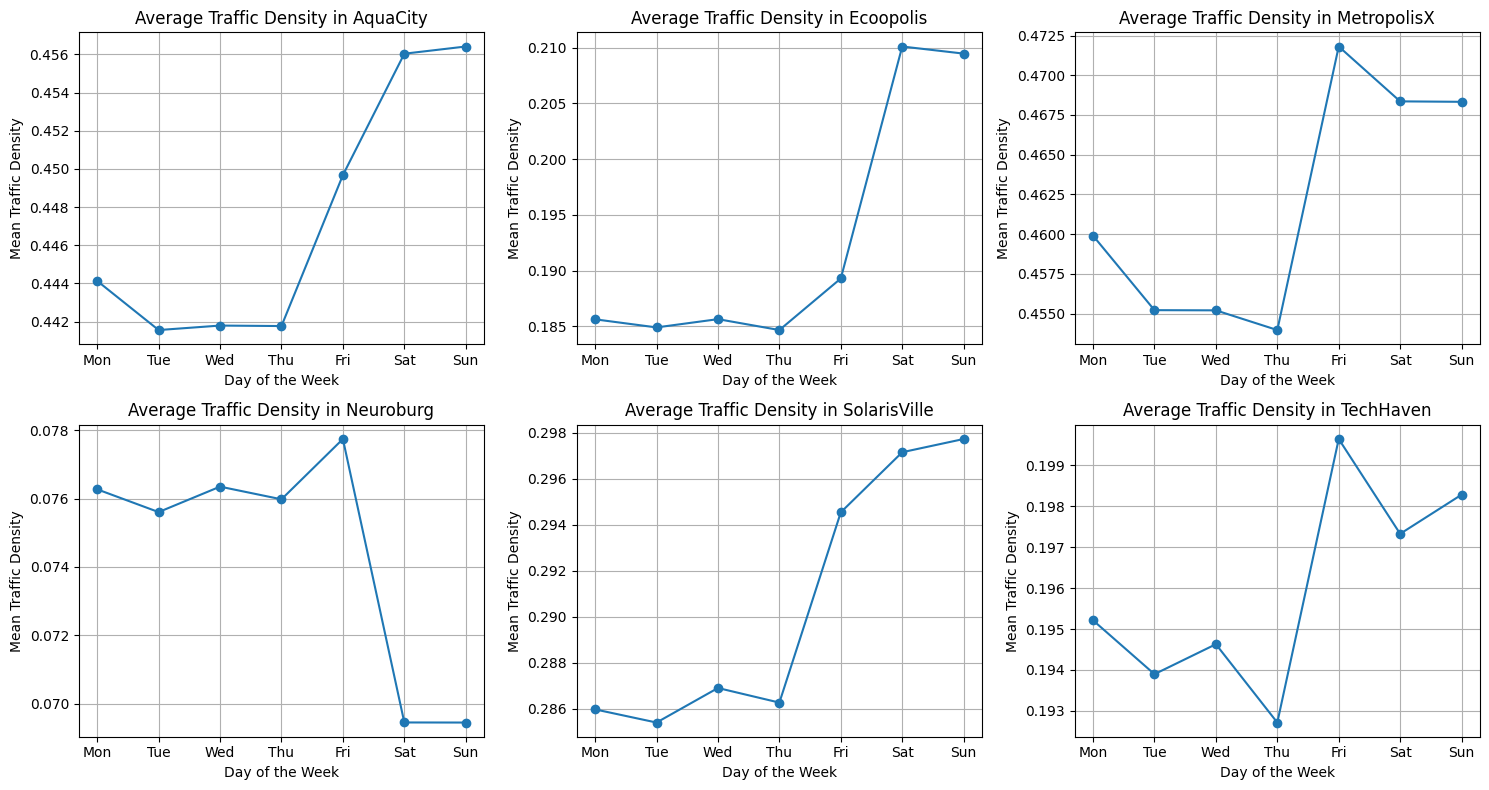

In [19]:
day_abbr = {
    'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed',
    'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat', 'Sunday': 'Sun'
}
density_data_days_format['Day Of Week'] = density_data_days_format['Day Of Week'].map(day_abbr)
density_data_new = density_data_days_format.copy()

# Group data by city and 'Day of Week', then calculate mean traffic density
mean_traffic_by_city_day = density_data_new.groupby(['City', 'Day Of Week'], observed=True)['Traffic Density'].mean().unstack()
line_plot_grids(mean_traffic_by_city_day)

##### Use heatmaps to visualize the intensity of traffic at different times of the day across the week.

In [20]:
import seaborn as sns
density_data_new.columns

Index(['City', 'Day Of Week', 'Hour Of Day', 'Speed', 'Is Peak Hour',
       'Random Event Occurred', 'Traffic Density'],
      dtype='object')

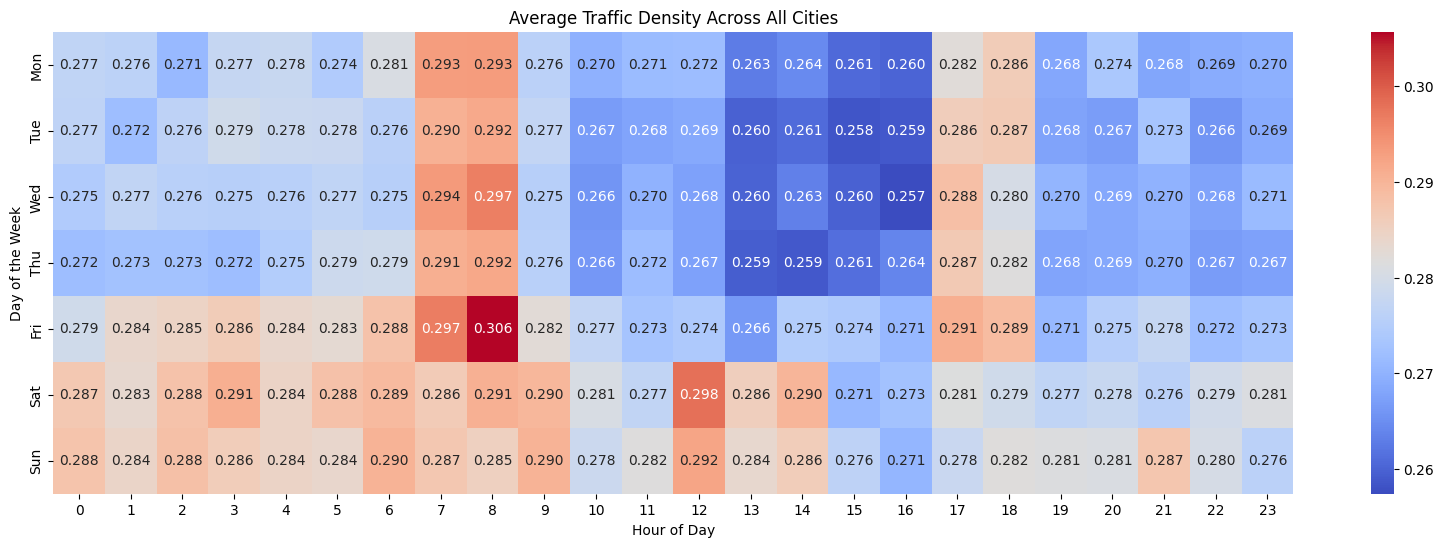

In [21]:
all_cities = density_data_new.groupby(['Day Of Week', 'Hour Of Day'], observed=True)['Traffic Density'].mean().unstack()

# Plotting the heatmap for all cities
plt.figure(figsize=(20, 6))
sns.heatmap(all_cities, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Average Traffic Density Across All Cities')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of Day')
plt.show()

##### Observation:

There are certain times during the day where traffic density is consistently higher or lower. For instance, traffic density appears to be higher during certain hours on Friday, as indicated by the deep red cell at around 8 AM.

While the patterns are relatively consistent, there are variations in traffic density from day to day. For instance, Saturday shows a notable increase in traffic density later in the day compared to other days.

The darkest red cells represent the peak traffic periods. On Friday, there's a pronounced peak at around 8 AM. This contrasts with other days, where peak times may be less distinct or occur at different hours.

Conversely, the blue cells indicate lower traffic density, with the lighter blue cells indicating the least density. It seems that late-night hours, such as 0-5 AM across all days, consistently have low traffic density.

This observation leans toward rejecting the null hypothesis. Instead, the evidence seems to support the alternative hypothesis.

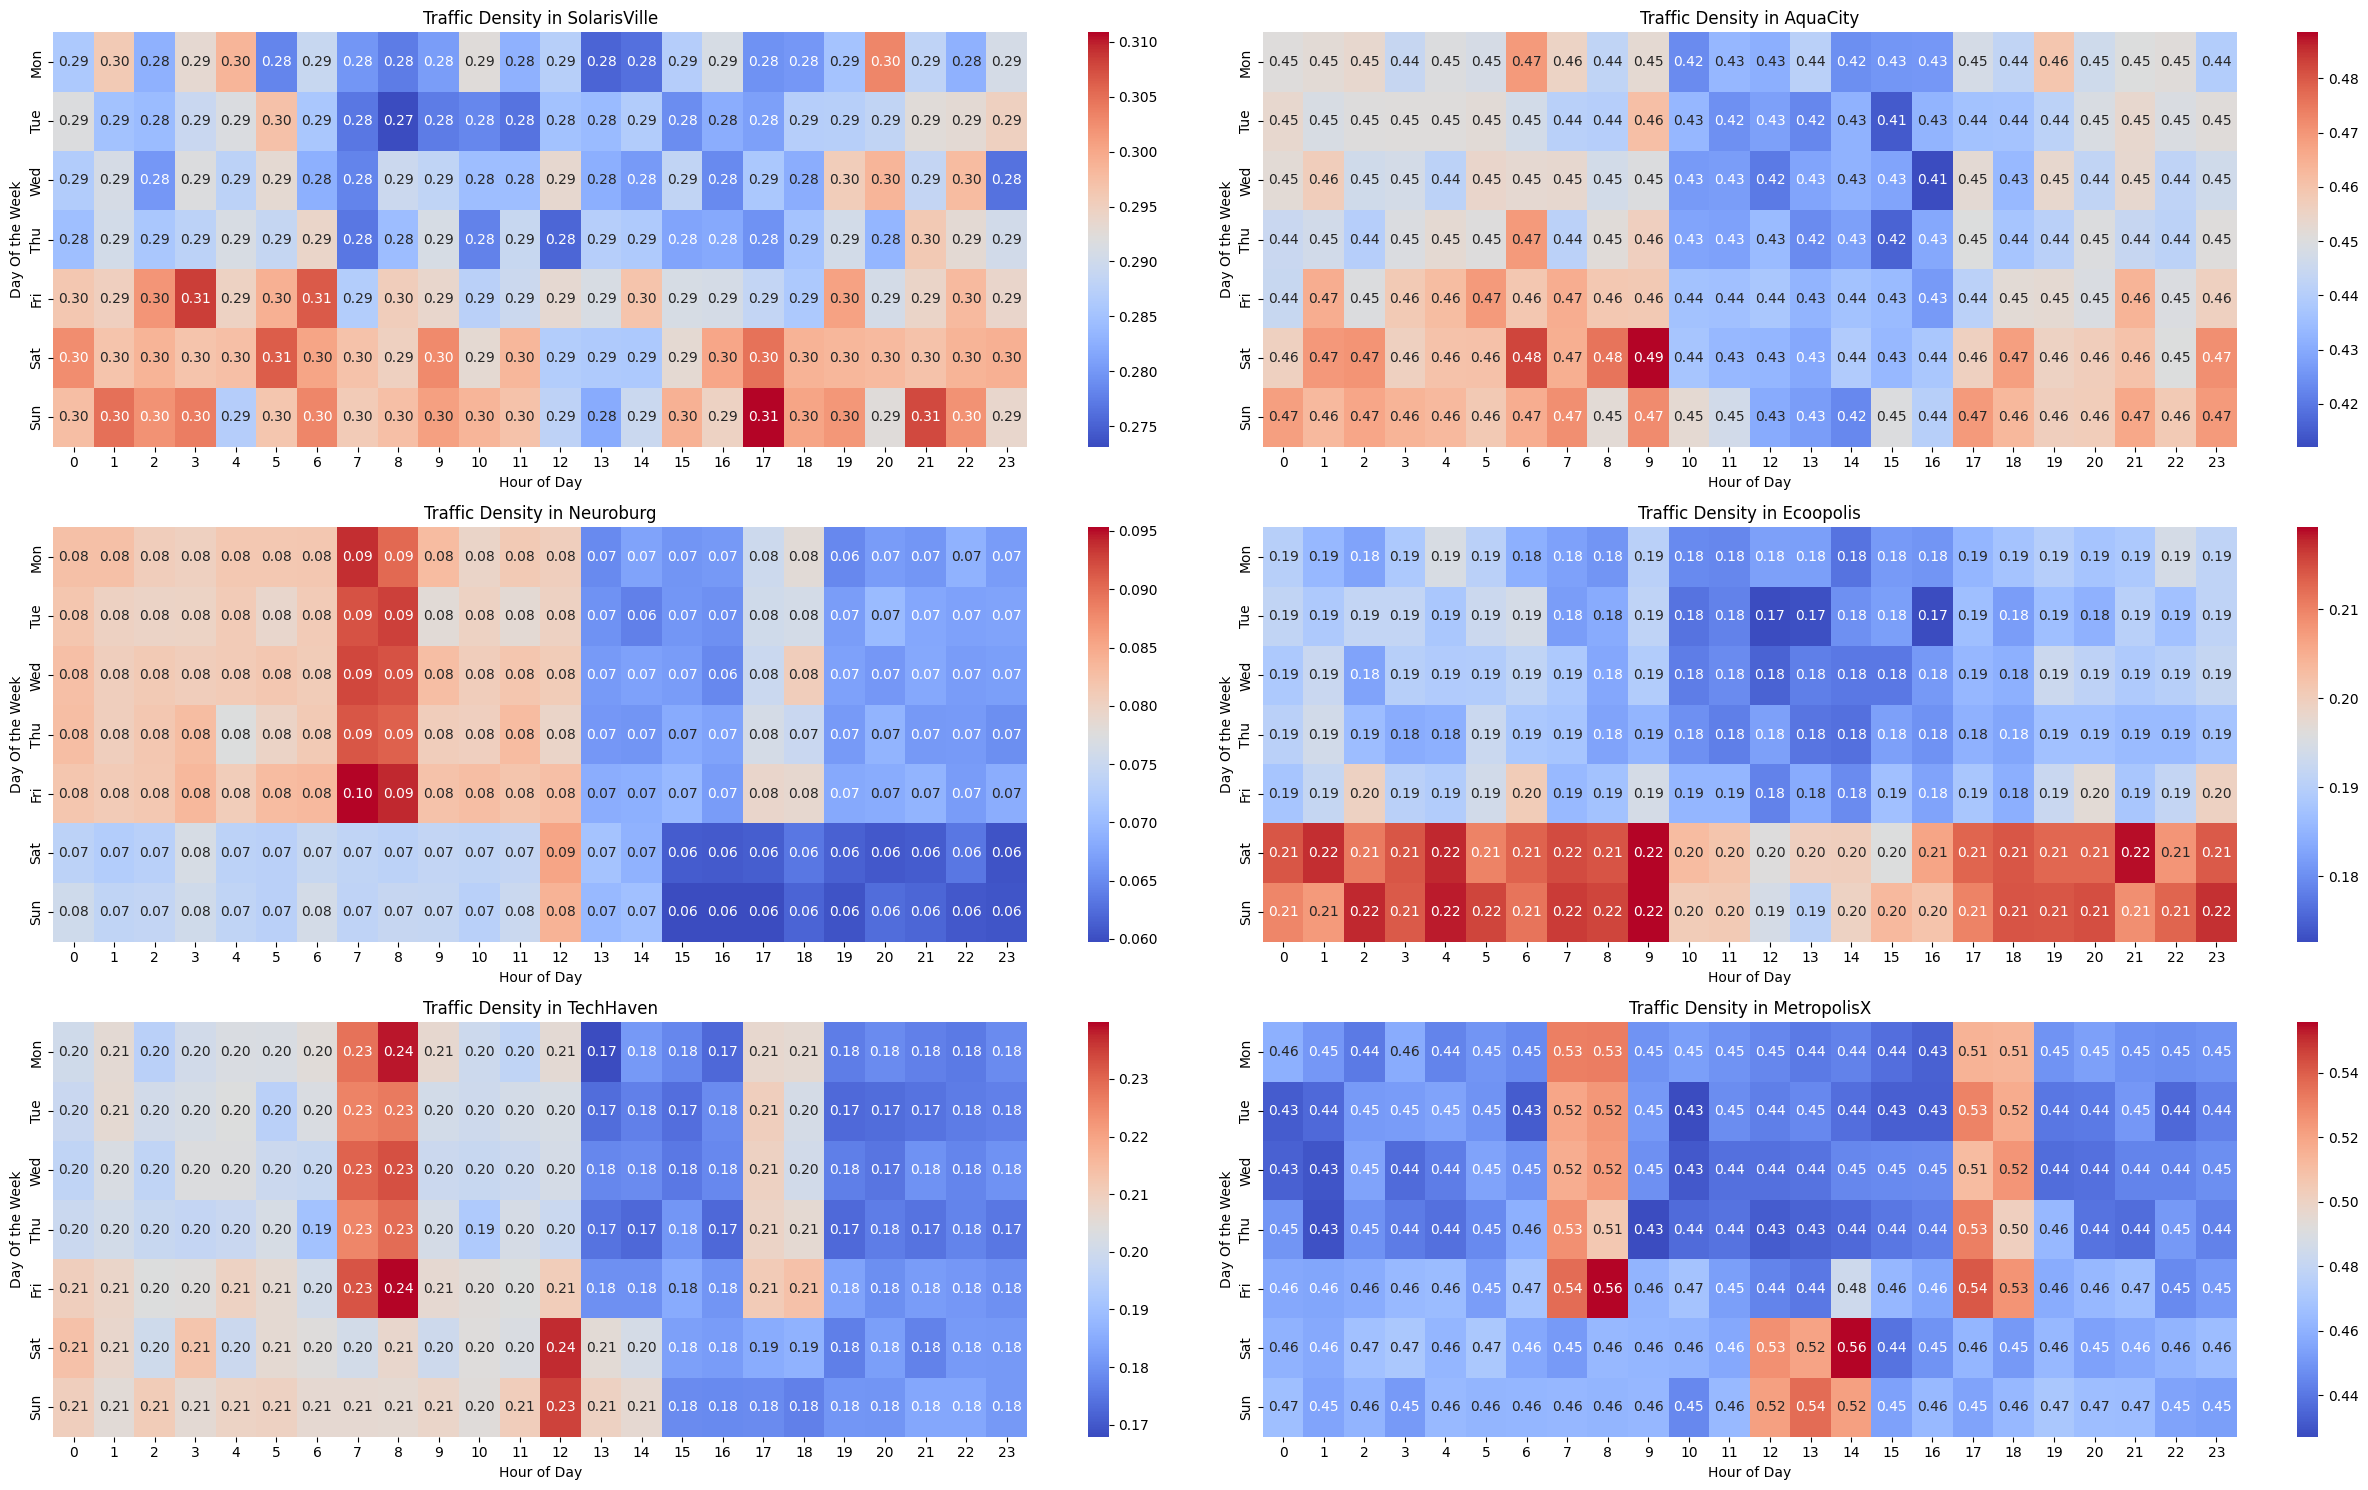

In [22]:
fig, axes = plt.subplots(nrows=(len(cities) + 1) // 2, ncols=2, figsize=(25, 5 * len(cities) // 2))
axes = axes.flatten()

city_data = density_data_new.groupby(['City', 'Day Of Week', 'Hour Of Day'], observed=True)['Traffic Density'].mean().unstack()

for i, city in enumerate(cities):
    
    if i < len(axes):
        ax = axes[i]
        sns.heatmap(city_data.loc[city], annot=True, cmap='coolwarm', ax=ax, fmt=".2f")
        ax.set_title(f'Traffic Density in {city}')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Day Of the Week')

plt.tight_layout()
plt.show()

In [23]:
density_data_new

,City,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Traffic Density
0,SolarisVille,Sun,20,29.4268,0,0,0.5241
1,AquaCity,Wed,2,118.8000,0,0,0.3208
2,Neuroburg,Wed,16,100.3904,0,0,0.0415
3,Ecoopolis,Thu,8,76.8000,1,0,0.1811
4,AquaCity,Sat,16,45.2176,0,0,0.4544
...,...,...,...,...,...,...,...
1219562,SolarisVille,Wed,13,75.7534,0,0,0.3840
1219563,MetropolisX,Sat,1,24.7660,0,0,0.5526
1219564,Neuroburg,Mon,19,75.6292,0,0,0.0564
1219565,MetropolisX,Mon,1,52.7983,0,0,0.5079


## Outlier Treatment

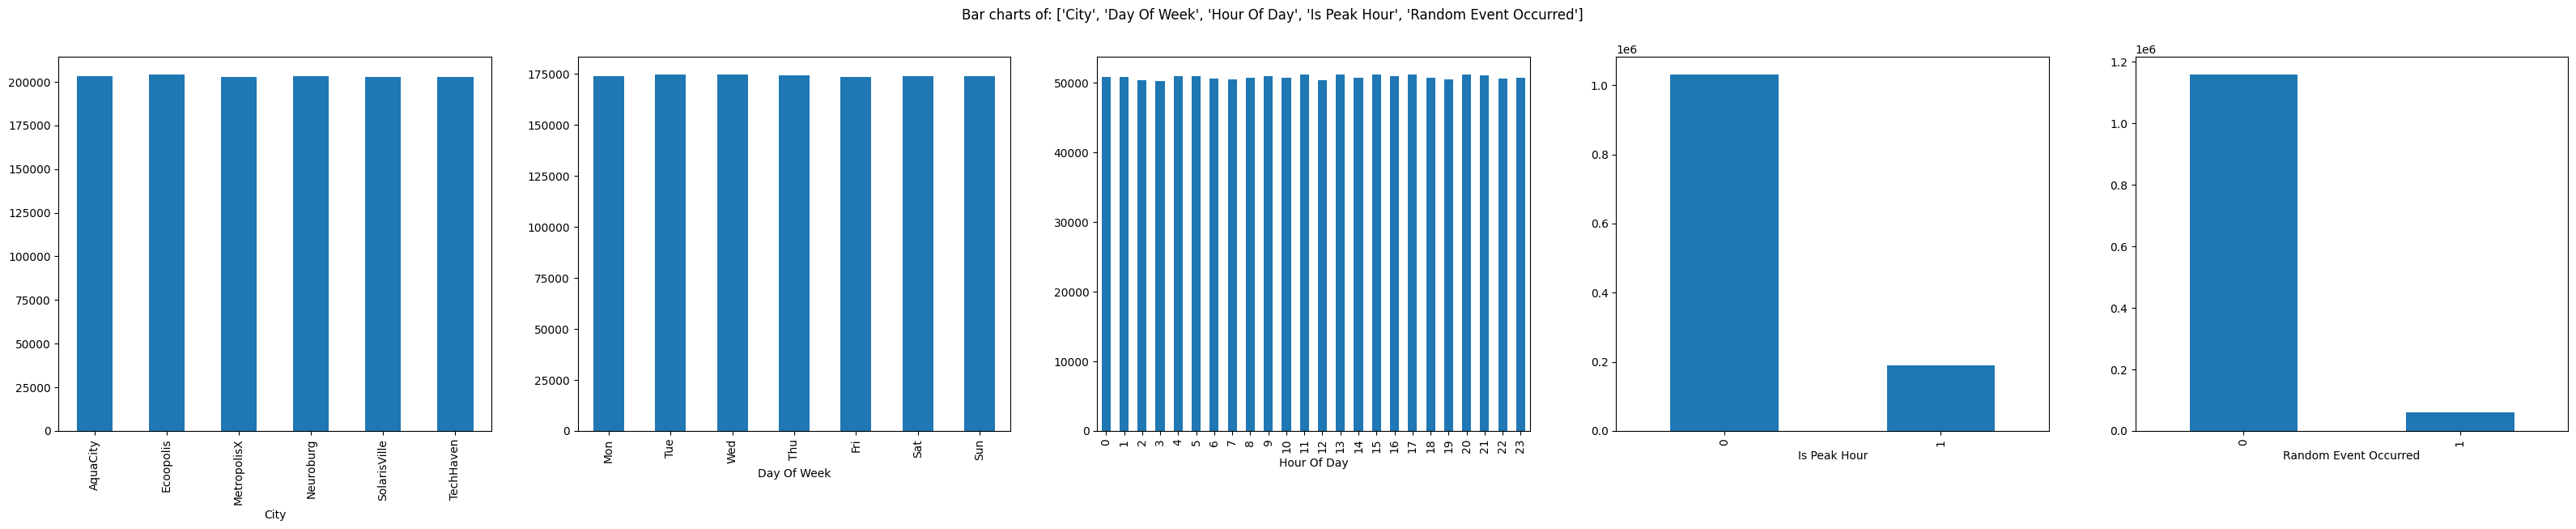

In [24]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName, observed=True).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=density_data_new, colsToPlot=['City', 'Day Of Week', 'Hour Of Day','Is Peak Hour', 'Random Event Occurred'])

"City", "Hour Of Day" and "Day of Week" variables are evenly distributed, as their bar charts show similar counts across categories. 

"Is Peak Hour" shows an imbalance, which is expected as peak hours are typically a subset of the day. 

"Random Event Occurred" shows also an imbalance. There are far fewer occurrences when a random event happened, as evidenced by the shorter bar for "1" (indicating an event occurred)

In [25]:
import numpy as np

def treat_outliers_with_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the nearest non-outlier value
        data[col] = np.where(data[col] < lower_bound, lower_bound,
                             np.where(data[col] > upper_bound, upper_bound, data[col]))
    
    return data

In [111]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors={}
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor, observed=True)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', format(AnovaResults[1], '.2f'))
            SelectedPredictors[predictor] = { 'P-Value': format(AnovaResults[1], '.4f') }
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return SelectedPredictors

In [112]:
cleaned_df = treat_outliers_with_iqr(density_data_new, ['Traffic Density'])
anova_result_1 = FunctionAnova(inpData=cleaned_df, 
              TargetVariable='Traffic Density', 
              CategoricalPredictorList=['Day Of Week', 'City', 'Is Peak Hour',	'Random Event Occurred'])
anova_result_1

##### ANOVA Results ##### 

Day Of Week is correlated with Traffic Density | P-Value: 0.00
City is correlated with Traffic Density | P-Value: 0.00
Is Peak Hour is correlated with Traffic Density | P-Value: 0.00
Random Event Occurred is NOT correlated with Traffic Density | P-Value: 0.8148727214999223


{'Day Of Week': {'P-Value': '0.0000'},
 'City': {'P-Value': '0.0000'},
 'Is Peak Hour': {'P-Value': '0.0000'}}

## Conclusion:

The conducted ANOVA analysis has yielded critical insights important to traffic management in urban centers. It is evident that traffic density is significantly influenced by the day of the week, with certain days experiencing heavier traffic flow. 

Additionally, there is a clear variance in traffic density across different cities, and peak hours are characterized by a substantial increase in traffic congestion. These findings are crucial for traffic officers who are tasked with managing daily traffic flow, as well as policymakers who are responsible for developing infrastructure and regulations to improve traffic conditions.

Importantly, our analysis indicates that random events do not have a statistically significant impact on traffic density. This suggests that routine urban activities are the primary drivers of traffic patterns, rather than sporadic events.

For traffic users, understanding that traffic density fluctuates predictably by day and during peak hours can aid in better planning their commutes, potentially reducing personal congestion experiences by opting for alternative routes or travel times.

Overall, these results should guide relevant stakeholders in tailoring traffic mitigation strategies that address the specific challenges identified in this study. By focusing on the influential factors of time and location, traffic management can be optimized, leading to more efficient urban mobility in Uganda.

# Analyzing the impact of various factors like weather, economic conditions, and vehicle types on traffic density and energy consumption. [ 10 MARKS ]

In [28]:
selected_vars = ['Vehicle Type', 'Weather', 'Economic Condition', 'Energy Consumption', 'Traffic Density']
other_density_data = df[selected_vars]
other_density_data.head()

,Vehicle Type,Weather,Economic Condition,Energy Consumption,Traffic Density
0,Drone,Snowy,Stable,14.7134,0.5241
1,Flying Car,Solar Flare,Recession,143.5682,0.3208
2,Autonomous Vehicle,Solar Flare,Recession,91.2640,0.0415
3,Drone,Clear,Booming,46.0753,0.1811
4,Autonomous Vehicle,Solar Flare,Stable,40.1934,0.4544


In [29]:
other_density_data.describe(include='object')

,Vehicle Type,Weather,Economic Condition
count,1219567,1219567,1219567
unique,4,5,3
top,Autonomous Vehicle,Solar Flare,Booming
freq,757454,244237,406684


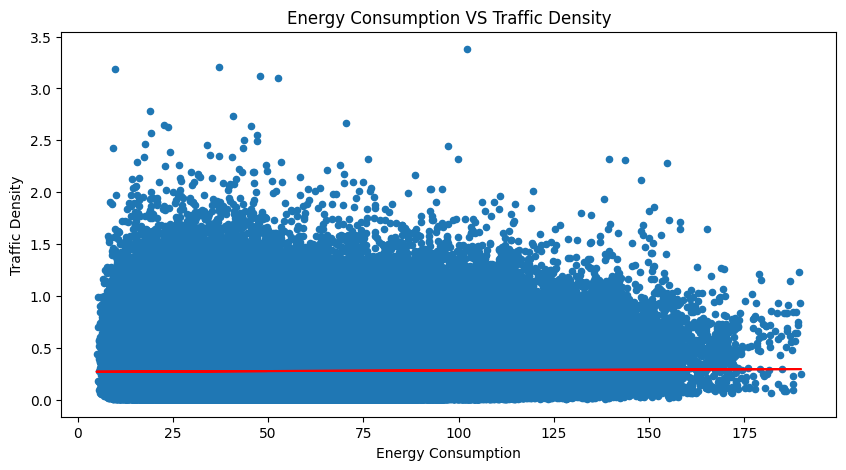

In [30]:
ax = other_density_data.plot.scatter(x='Energy Consumption', y='Traffic Density', figsize=(10, 5),
                                     title="Energy Consumption VS Traffic Density")

# Calculate the line of best fit
X = other_density_data['Energy Consumption']
Y = other_density_data['Traffic Density']
m, b = np.polyfit(X, Y, 1)

# Add the line of best fit
plt.plot(X, m*X + b, color='red')
plt.show()

##### **Observation:**

> No correlation between **Energy Consumption** and **Traffic Density**. This indicated by the line of best fit that is not slighting in any direction.

In [31]:
def plot_heatmap(dataset, target_column):
    
    corr = dataset.corr()[target_column]
  
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
    plt.title('Correlation Heatmap')
    plt.show()


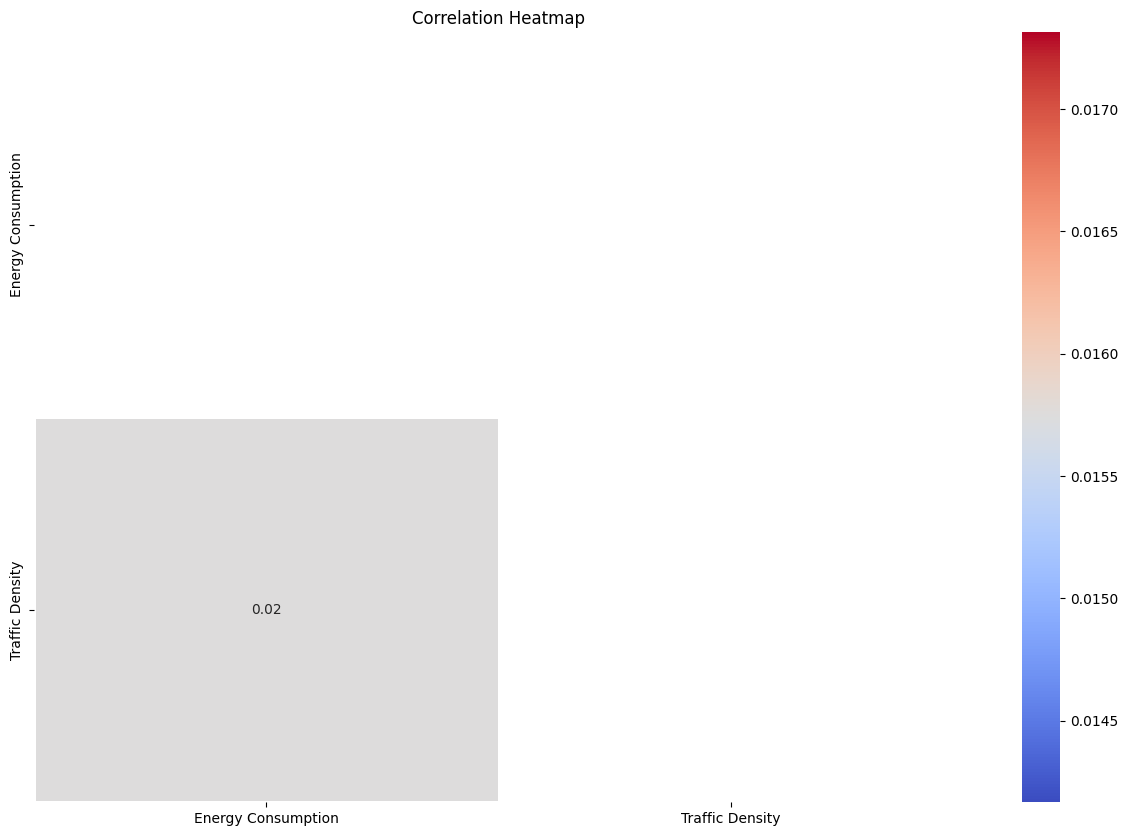

In [32]:
plot_heatmap(other_density_data[['Energy Consumption', 'Traffic Density']], 'Traffic Density')

##### **Observation:**

> Very weak positive correlation between Energy Consumption and traffic density

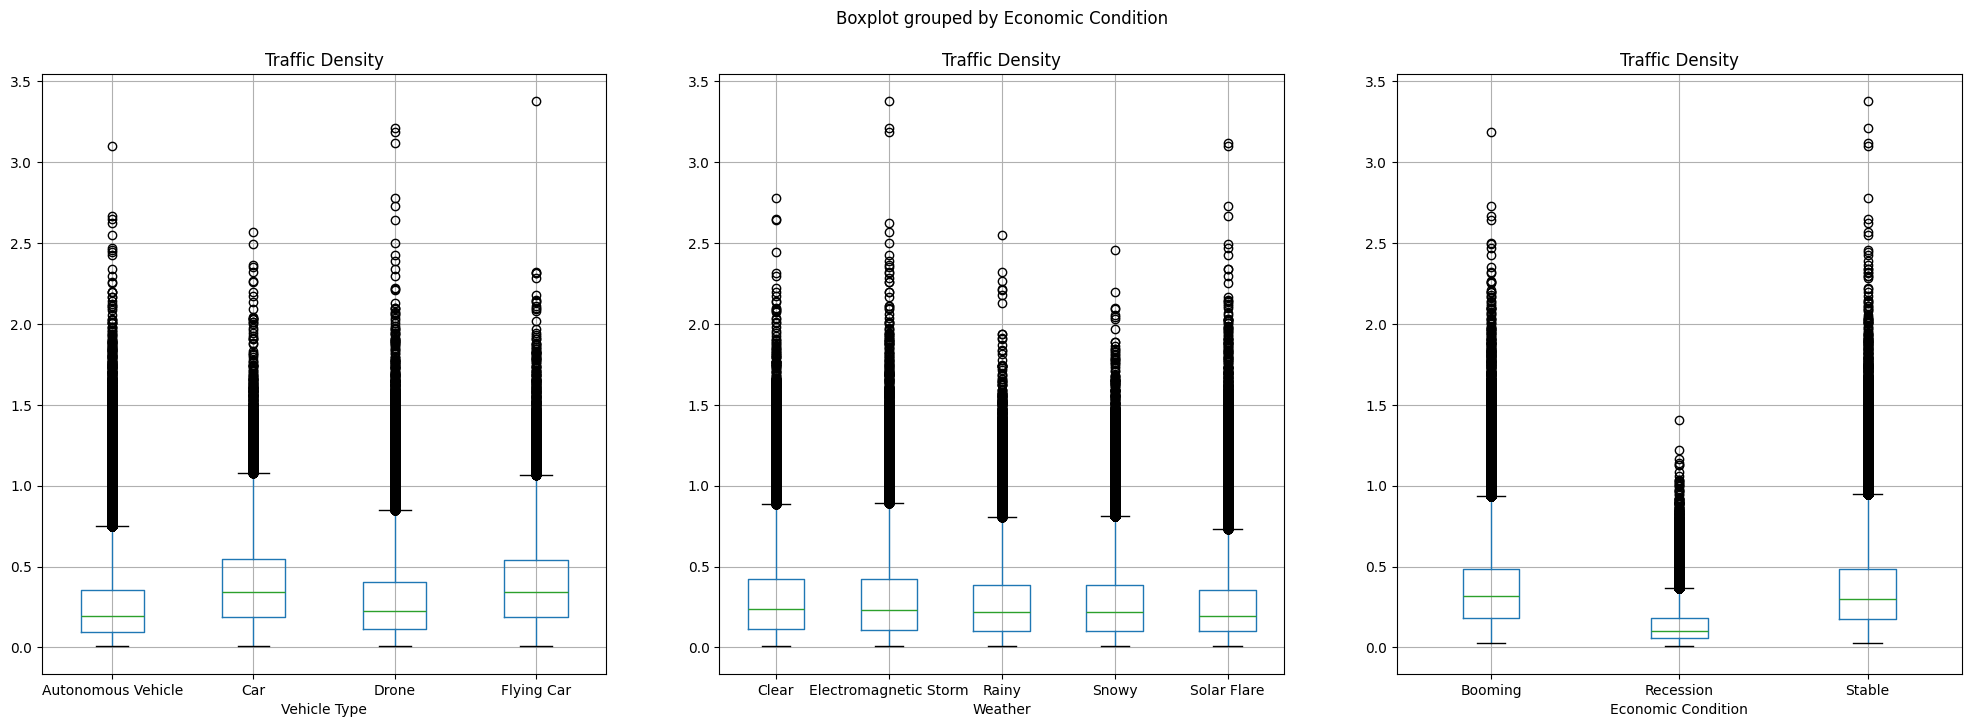

In [33]:
CategoricalColsList=['Vehicle Type',	'Weather',	'Economic Condition']

# import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(24,8))

# Creating box plots for each categorical predictor against the Target Variable 
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    other_density_data.boxplot(column='Traffic Density', by=PredictorCol, figsize=(5,8), vert=True, ax=PlotCanvas[i])

##### **Observations:**

**Vehicle Type:** It seems that traffic density varies by vehicle type, with **Car** and **Flying Car** showing a larger interquartile range, indicating more variability in traffic density for these vehicles.

**Weather:** The spread of traffic density across these weather conditions appears quite consistent, but with some outliers.

**Economic Condition:** The 'Booming' and 'Stable' categories show a higher median and a broader range than 'Recession' suggesting that economic prosperity might be associated with higher traffic density.

In [34]:
other_density_data.columns


Index(['Vehicle Type', 'Weather', 'Economic Condition', 'Energy Consumption',
       'Traffic Density'],
      dtype='object')

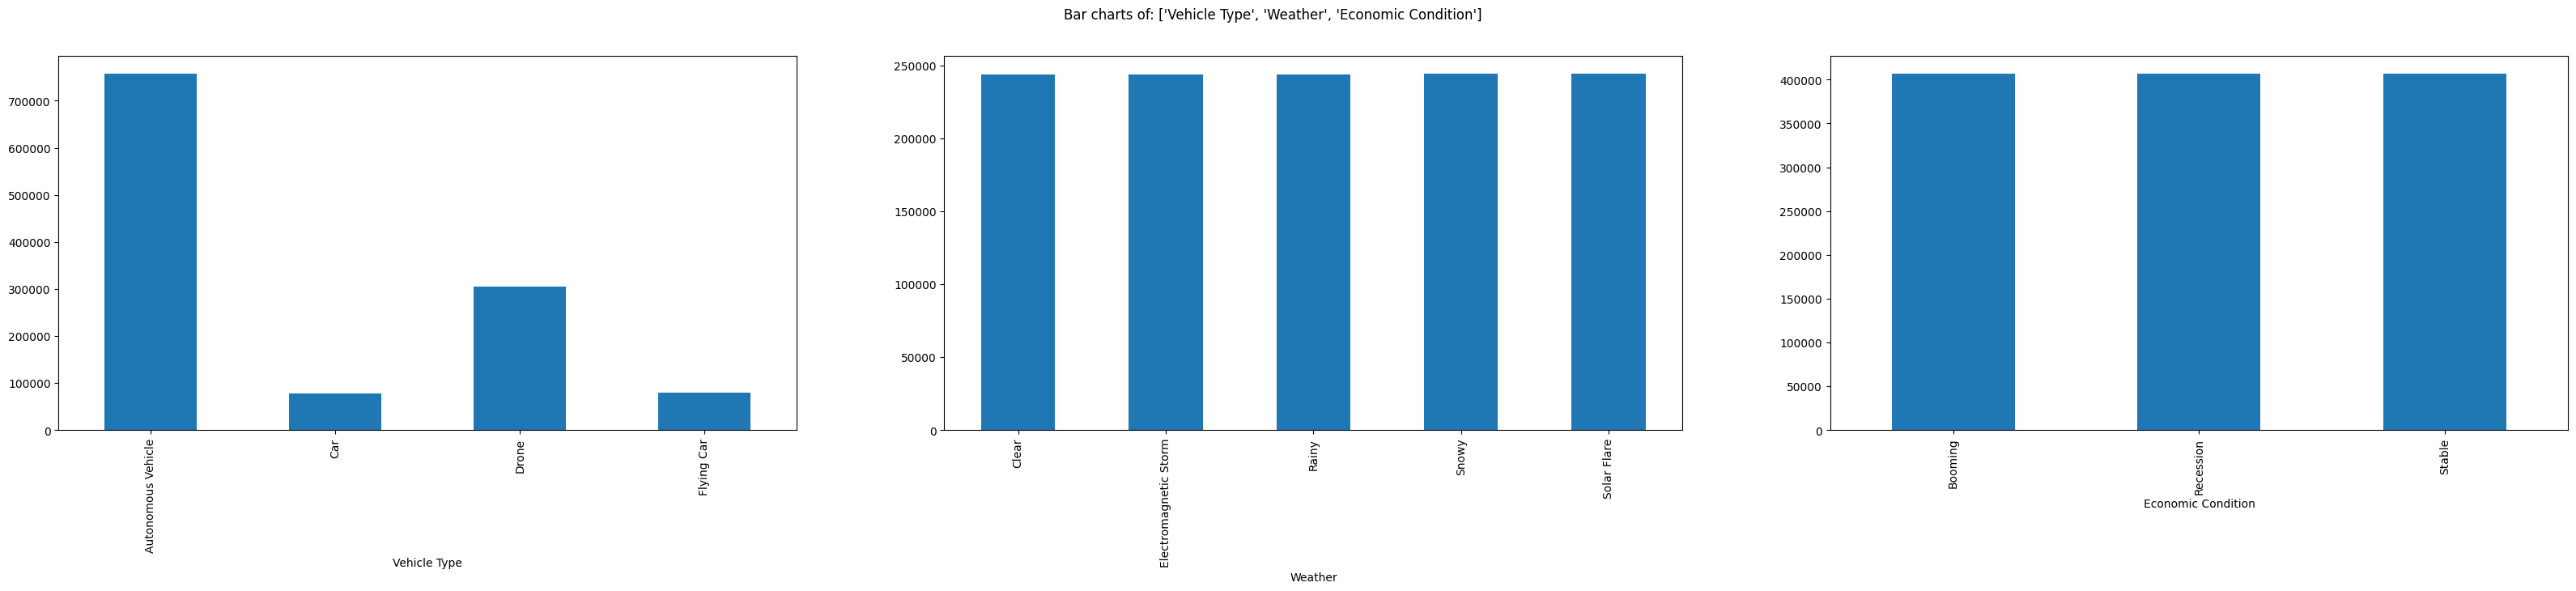

In [35]:
PlotBarCharts(inpData=other_density_data, colsToPlot=['Vehicle Type', 'Weather', 'Economic Condition'])

##### **Observation:**

'Weather', and 'Economic Condition' variables are evenly distributed, as their bar charts show similar counts across categories. 

'Vehicle Type' shows an imbalance. Far fewer other vehicle types were observed compared to autonomous vehicles.

In [114]:
cleaned_other_density_df = treat_outliers_with_iqr(other_density_data, ['Traffic Density'])
anova_results_2  = FunctionAnova(inpData=cleaned_other_density_df,
              TargetVariable='Traffic Density',  CategoricalPredictorList=['Vehicle Type', 'Weather', 'Economic Condition'])

anova_result_3 = {**anova_result_1, **anova_results_2}
anova_result_3 = pd.DataFrame(anova_result_3)
anova_result_3

C:\Users\joshk\AppData\Local\Temp\ipykernel_30620\649549803.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] < lower_bound, lower_bound,


##### ANOVA Results ##### 

Vehicle Type is correlated with Traffic Density | P-Value: 0.00
Weather is correlated with Traffic Density | P-Value: 0.00
Economic Condition is correlated with Traffic Density | P-Value: 0.00


,Day Of Week,City,Is Peak Hour,Vehicle Type,Weather,Economic Condition
P-Value,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


# Developing and testing traffic density prediction algorithms for smart city solutions. [ 10 MARKS ]

In [37]:
selected_columns = ['Vehicle Type', 'Weather', 'Economic Condition','Day Of Week', 'City', 'Is Peak Hour', 'Traffic Density']

# Selecting final columns
DataForML=df[selected_columns]
DataForML.head()

,Vehicle Type,Weather,Economic Condition,Day Of Week,City,Is Peak Hour,Traffic Density
0,Drone,Snowy,Stable,Sunday,SolarisVille,0,0.5241
1,Flying Car,Solar Flare,Recession,Wednesday,AquaCity,0,0.3208
2,Autonomous Vehicle,Solar Flare,Recession,Wednesday,Neuroburg,0,0.0415
3,Drone,Clear,Booming,Thursday,Ecoopolis,1,0.1811
4,Autonomous Vehicle,Solar Flare,Stable,Saturday,AquaCity,0,0.4544


In [38]:
# Save this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

#### Encoding categorical variables

In [39]:
vehicle_type_mapping = {vehicle_type: idx for idx, vehicle_type in enumerate(df['Vehicle Type'].unique())}
weather_mapping = {weather: idx for idx, weather in enumerate(df['Weather'].unique())}
economic_condition_mapping = {condition: idx for idx, condition in enumerate(df['Economic Condition'].unique())}
day_of_week_mapping = {day: idx for idx, day in enumerate(df['Day Of Week'].unique())}
city_mapping = {city: idx for idx, city in enumerate(df['City'].unique())}

print(f'Wether: {weather_mapping}')
print(f'City: {city_mapping}')
print(f'Week Day: {day_of_week_mapping}')
print(f'Economic Condition: {economic_condition_mapping}')
print(f'Vehicle Type: {vehicle_type_mapping}')


Wether: {'Snowy': 0, 'Solar Flare': 1, 'Clear': 2, 'Rainy': 3, 'Electromagnetic Storm': 4}
City: {'SolarisVille': 0, 'AquaCity': 1, 'Neuroburg': 2, 'Ecoopolis': 3, 'TechHaven': 4, 'MetropolisX': 5}
Week Day: {'Sunday': 0, 'Wednesday': 1, 'Thursday': 2, 'Saturday': 3, 'Monday': 4, 'Friday': 5, 'Tuesday': 6}
Economic Condition: {'Stable': 0, 'Recession': 1, 'Booming': 2}
Vehicle Type: {'Drone': 0, 'Flying Car': 1, 'Autonomous Vehicle': 2, 'Car': 3}


In [40]:
# Apply the mappings to the DataFrame to create new encoded columns
DataForML.loc[:, 'Vehicle Type'] = DataForML['Vehicle Type'].map(vehicle_type_mapping)
DataForML.loc[:,'Weather'] = DataForML['Weather'].map(weather_mapping)
DataForML.loc[:,'City'] = DataForML['City'].map(city_mapping)
DataForML.loc[:,'Day Of Week'] = DataForML['Day Of Week'].map(day_of_week_mapping)
DataForML.loc[:,'Economic Condition'] = DataForML['Economic Condition'].map(economic_condition_mapping)

DataForML.head()

,Vehicle Type,Weather,Economic Condition,Day Of Week,City,Is Peak Hour,Traffic Density
0,0,0,0,0,0,0,0.5241
1,1,1,1,1,1,0,0.3208
2,2,1,1,1,2,0,0.0415
3,0,2,2,2,3,1,0.1811
4,2,1,0,3,1,0,0.4544


#### Splitting the data into Training and Testing sample

In [41]:
# Separate Target Variable and Predictor Variables
TargetVariable='Traffic Density'
Predictors=['Vehicle Type', 'Weather', 'Economic Condition','Day Of Week', 'City', 'Is Peak Hour']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# # Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

#### Standardization/Normalization of data

In [42]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
cleaned_df = treat_outliers_with_iqr(density_data_new, ['Traffic Density'])
FunctionAnova(inpData=cleaned_df, 
              TargetVariable='Traffic Density', 
              CategoricalPredictorList=['Day Of Week', 'City', 'Is Peak Hour',	'Random Event Occurred'])

##### ANOVA Results ##### 

Day Of Week is correlated with Traffic Density | P-Value: 0.00
City is correlated with Traffic Density | P-Value: 0.00
Is Peak Hour is correlated with Traffic Density | P-Value: 0.00
Random Event Occurred is NOT correlated with Traffic Density | P-Value: 0.8148727214999223


['Day Of Week', 'City', 'Is Peak Hour']

#### Trying multiple regression algorithms

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np

def train_and_evaluate(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Assuming evaluate_classification_model is a defined function that returns the evaluation metrics
    msq, rmsq, r2_score, mae = evaluate_classification_model(y_test, y_pred)
    
    return name, msq, rmsq, r2_score, mae

def evaluate_classification_model(y_true, y_pred):
    # Calculate evaluation metrics
    mae = metrics.mean_absolute_error(y_true, y_pred)
    msq= metrics.mean_squared_error(y_true, y_pred)
    rmsq= np.sqrt(msq)
    r2_score = metrics.r2_score(y_true, y_pred)
    
    return msq, rmsq, r2_score, mae

def train_and_store_models_alt(X_train, X_test, y_train, y_test):
    models = {
        'Neural Network': MLPRegressor(max_iter=1000),
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        # 'Support Vector Machine': SVR(),
        'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
    }
    
    model_results = Parallel(n_jobs=-1, verbose=12)(delayed(train_and_evaluate)(name, model, X_train, y_train, X_test, y_test) 
                            for name, model in models.items())

    # Convert results to a dictionary
    model_results = {
        name: 
          {'Mean Squared Error': f"{msq:.4f}", 'Root Mean Squared Error': f"{rmsq:.4f}", 'R2 Value': f"{r2_score:.4f}", 'Mean Absolute Error': f"{mae:.4f}"} 
          for name, msq, rmsq, r2_score, mae in model_results
      }
    
    # # Determine the best model based on the combined score
    best_model = max(model_results, key=lambda x: model_results[x]['R2 Value'])

    # print("Results for each model:\n")
    # for model_name, results in model_results.items():
        # print(f"Model: {model_name}")
        # print(f"Mean Absolute Error: {results['Mean Absolute Error']:.2f}")
        # print(f"Mean Squared Error: {results['Mean Squared Error']:.2f}")
        # print(f"Root Mean Squared Error: {results['Root Mean Squared Error']:.2f}")
        # print(f"R2 Value: {results['R2 Value']:.4f}")
        # print("\n==================================================")

    print(f"The best model is: {best_model}")
    print("==================================================\n")
    
    return model_results


In [92]:
## Train and select the best model based on multiple metrics
results = train_and_store_models_alt(X_train, X_test, y_train, y_test)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    1.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    1.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:   31.5s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  1.0min remaining:   20.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.7min finished


The best model is: Decision Tree



In [86]:
pd.DataFrame(results)

,Neural Network,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest,Gradient Boosting,K-Nearest Neighbors
Mean Squared Error,0.012815,0.047749,0.047749,4.794987e-02,0.012177,0.012179,0.012915,0.014808
Root Mean Squared Error,0.113205,0.218515,0.218515,2.189746e-01,0.110351,0.110358,0.113642,0.121689
R2 Value,0.732735,0.004190,0.004190,-7.342604e-08,0.746042,0.746008,0.730666,0.691174
Mean Absolute Error,0.075219,0.171667,0.171667,1.715565e-01,0.071308,0.071310,0.075187,0.079207


##### **Observation:**

> From this analysis, the best model is: **Decision Tree**

In [50]:
model_dtr = DecisionTreeRegressor()

# Creating the model on Training Data
dtr_model = model.fit(X_train,y_train)
prediction_1 = dtr_model.predict(X_test)
prediction_1

array([0.25386256, 0.27283189, 0.55305592, ..., 0.03853051, 0.85458275,
       0.15802875])

In [51]:
data_df_dtr = pd.DataFrame()
data_df_dtr['Actual Traffic Density'] = DataForML['Traffic Density']
data_df_dtr['Predicted Traffic Density'] = pd.Series(prediction_1)
data_df_dtr

,Actual Traffic Density,Predicted Traffic Density
0,0.5241,0.253863
1,0.3208,0.272832
2,0.0415,0.553056
3,0.1811,0.518398
4,0.4544,0.197058
...,...,...
1219562,0.3840,NaN
1219563,0.5526,NaN
1219564,0.0564,NaN
1219565,0.5079,NaN
